In [40]:
import numpy as np
from gillespy2 import (
    Model, Species, Parameter, Reaction, Event, \
                      EventTrigger, EventAssignment, RateRule, \
                      AssignmentRule, FunctionDefinition, SSACSolver, ODESolver
)


# Lotkavolterra_Oscillator-Stochastic

In [41]:
class LotkavolterraOscillatorStochastic(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Lotkavolterra_Oscillator-Stochastic")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="rabbit_birth_rate", expression="10"))
        self.add_parameter(Parameter(name="fox_birth_rate", expression="0.01"))
        self.add_parameter(Parameter(name="fox_death_rate", expression="10"))

        # Variables
        self.add_species(Species(name="rabbit", initial_value=1000, mode="discrete"))
        self.add_species(Species(name="fox", initial_value=1000, mode="discrete"))

        # Reactions
        self.add_reaction(Reaction(name="rabbit_birth", reactants={'rabbit': 1}, products={'rabbit': 2}, 
                                   rate="rabbit_birth_rate"))
        self.add_reaction(Reaction(name="fox_birth", reactants={'rabbit': 1, 'fox': 1}, products={'fox': 2}, 
                                   rate="fox_birth_rate"))
        self.add_reaction(Reaction(name="fox_death", reactants={'fox': 1}, products={}, 
                                   rate="fox_death_rate"))

        # Timespan
        self.timespan(np.linspace(0, 10, 1001))

In [42]:
model = LotkavolterraOscillatorStochastic()

# Simulation Parameters

In [43]:
def configure_simulation():
    solver = SSACSolver(model=model)
    kwargs = {
        "solver":solver,
        "number_of_trajectories":1,
        "seed" : 10
    }
    return kwargs

In [44]:
kwargs = configure_simulation()
%time results = model.run(**kwargs)

CPU times: user 4.22 ms, sys: 3.26 ms, total: 7.47 ms
Wall time: 135 ms


# Visualization

In [45]:
results.plotplotly()

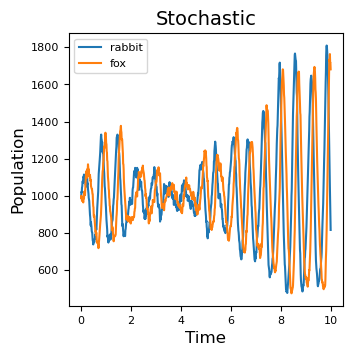

In [46]:
import matplotlib.pyplot as plt

#results.plot(figsize=(12,8))
results.plot(figsize=(3.54,3.54))#, dpi=600)
plt.title("Stochastic", fontsize=14)
# plt.legend(fontsize=18)
# plt.ylabel('Population counts', fontsize=22)
# plt.xlabel('Time', fontsize=22)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best', fontsize=8)

plt.savefig('GillesPy2_lotkavolterra_ex.pdf',dpi=600)

In [72]:
!xdg-open .

In [47]:
# repeat with ODE solver:
def configure_simulation():
    solver = ODESolver(model=model)
    kwargs = {
        "solver":solver,
        "number_of_trajectories":1,
        #"seed" : 10
    }
    return kwargs


In [48]:
kwargs = configure_simulation()
%time results = model.run(**kwargs)

CPU times: user 13.7 ms, sys: 1.86 ms, total: 15.6 ms
Wall time: 15.3 ms


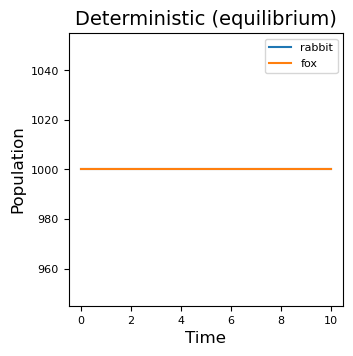

In [49]:
import matplotlib.pyplot as plt

results.plot(figsize=(3.54,3.54))#, dpi=600)
plt.title("Deterministic (equilibrium)", fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best', fontsize=8)

plt.savefig('GillesPy2_lotkavolterra_ex_ode.pdf',dpi=600)

In [50]:
# change model so that initial condition is not at ODE equilibrium (1000,1000)
# set initial fox pop to 700 instead of 1000
class LotkavolterraOscillatorStochastic2(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Lotkavolterra_Oscillator-Stochastic")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="rabbit_birth_rate", expression="10"))
        self.add_parameter(Parameter(name="fox_birth_rate", expression="0.01"))
        self.add_parameter(Parameter(name="fox_death_rate", expression="10"))

        # Variables
        self.add_species(Species(name="rabbit", initial_value=1000, mode="discrete"))
        self.add_species(Species(name="fox", initial_value=700, mode="discrete"))

        # Reactions
        self.add_reaction(Reaction(name="rabbit_birth", reactants={'rabbit': 1}, products={'rabbit': 2}, 
                                   rate="rabbit_birth_rate"))
        self.add_reaction(Reaction(name="fox_birth", reactants={'rabbit': 1, 'fox': 1}, products={'fox': 2}, 
                                   rate="fox_birth_rate"))
        self.add_reaction(Reaction(name="fox_death", reactants={'fox': 1}, products={}, 
                                   rate="fox_death_rate"))

        # Timespan
        self.timespan(np.linspace(0, 10, 1001))

model2 = LotkavolterraOscillatorStochastic2()

In [51]:
# repeat simulation code
def configure_simulation2():
    solver = ODESolver(model=model2)
    kwargs = {
        "solver":solver,
        "number_of_trajectories":1,
        #"seed" : 10
    }
    return kwargs
kwargs2 = configure_simulation2()
%time results2 = model2.run(**kwargs2)

CPU times: user 28.7 ms, sys: 2.25 ms, total: 30.9 ms
Wall time: 31 ms


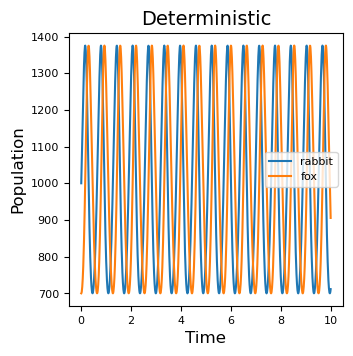

In [52]:
import matplotlib.pyplot as plt

results2.plot(figsize=(3.54,3.54))#, dpi=600)
plt.title("Deterministic", fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best', fontsize=8)

plt.savefig('GillesPy2_lotkavolterra_ex_ode_nonequilibrium.pdf',dpi=600)